In [1]:
import pandas as pd
import numpy as np

In [2]:
df_adult = pd.read_csv("/kaggle/input/adult-income-data/adult.csv")
df_adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# DATA CLEANING

## AGE COLUMN

In [3]:
print(df_adult.age.isna().sum())
print(df_adult.age.isnull().sum())
print(df_adult.age.unique())
print("Age is good")

0
0
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
Age is good


## WORKCLASS COLUMN

In [4]:
print(df_adult.workclass.isna().sum())
print(df_adult.workclass.isnull().sum())
print(df_adult.workclass.unique())
print("")
print("workclass not good so we have question marks")
print("")

# Count the number of question marks in the 'workclass' column
print("How many question marks are there in the column")
print((df_adult.workclass == "?").sum())

# Replace question marks with the mode of the 'workclass' column
print("Mode of workclass is:",df_adult['workclass'].mode()[0])
mode_workclass = df_adult['workclass'].mode()[0]
df_adult['workclass'] = df_adult['workclass'].replace('?', mode_workclass)
print("")
print("WORKING CLASS COLUMN GOOD")

0
0
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

workclass not good so we have question marks

How many question marks are there in the column
1836
Mode of workclass is: Private

WORKING CLASS COLUMN GOOD


## fnlwgt Final weight Column

In [5]:
print(df_adult.fnlwgt.describe())
#print(df_adult.fnlwgt.info())
print(df_adult.fnlwgt.isna().sum())
print(df_adult.fnlwgt.isnull().sum())
print("fnlwgt is good")

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64
0
0
fnlwgt is good


## education column

In [6]:
print(df_adult.education.isna().sum())
print(df_adult.education.isnull().sum())
print(df_adult.education.unique())
print("Education is good")

0
0
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
Education is good


In [7]:
print(df_adult['education.num'].isna().sum())
print(df_adult['education.num'].isnull().sum())
print(df_adult['education.num'].unique())
print("Education.num is good")

0
0
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
Education.num is good


In [8]:
print(df_adult['marital.status'].isna().sum())
print(df_adult['marital.status'].isnull().sum())
print(df_adult['marital.status'].unique())
print("marital.status is good")

0
0
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
marital.status is good


In [9]:
print(df_adult['occupation'].isna().sum())
print(df_adult['occupation'].isnull().sum())
print(df_adult['occupation'].unique())
print("occupation is good")

0
0
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
occupation is good


In [10]:
# Count the number of question marks in the 'occupation' column
print("How many question marks are there in the column")
print((df_adult.occupation == "?").sum())

# Replace question marks with the mode of the 'workclass' column
print("Mode of occupation is:",df_adult['occupation'].mode()[0])
mode_occupation = df_adult['occupation'].mode()[0]
df_adult['occupation'] = df_adult['occupation'].replace('?', mode_occupation)
print("")
print("occupation COLUMN GOOD")

How many question marks are there in the column
1843
Mode of occupation is: Prof-specialty

occupation COLUMN GOOD


In [11]:
print(df_adult['relationship'].isna().sum())
print(df_adult['relationship'].isnull().sum())
print(df_adult['relationship'].unique())
print("relationship is good")

0
0
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
relationship is good


In [12]:
print(df_adult['race'].isna().sum())
print(df_adult['race'].isnull().sum())
print(df_adult['race'].unique())
print("race is good")

0
0
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
race is good


In [13]:
print(df_adult['sex'].isna().sum())
print(df_adult['sex'].isnull().sum())
print(df_adult['sex'].unique())
print("sex column is good")

0
0
['Female' 'Male']
sex column is good


In [14]:
print(df_adult['capital.gain'].isna().sum())
print(df_adult['capital.gain'].isnull().sum())
print(df_adult['capital.gain'].unique())
print("capital.gain is good")

0
0
[    0 99999 41310 34095 27828 25236 25124 22040 20051 18481 15831 15024
 15020 14344 14084 13550 11678 10605 10566 10520  9562  9386  8614  7978
  7896  7688  7443  7430  7298  6849  6767  6723  6514  6497  6418  6360
  6097  5721  5556  5455  5178  5060  5013  4934  4931  4865  4787  4687
  4650  4508  4416  4386  4101  4064  3942  3908  3887  3818  3781  3674
  3471  3464  3456  3432  3418  3411  3325  3273  3137  3103  2993  2977
  2964  2961  2936  2907  2885  2829  2653  2635  2597  2580  2538  2463
  2414  2407  2387  2354  2346  2329  2290  2228  2202  2176  2174  2105
  2062  2050  2036  2009  1848  1831  1797  1639  1506  1471  1455  1424
  1409  1173  1151  1111  1086  1055   991   914   594   401   114]
capital.gain is good


In [15]:
print(df_adult['capital.loss'].isna().sum())
print(df_adult['capital.loss'].isnull().sum())
print(df_adult['capital.loss'].unique())
print("capital.loss is good")

0
0
[4356 3900 3770 3683 3004 2824 2754 2603 2559 2547 2489 2472 2467 2457
 2444 2415 2392 2377 2352 2339 2282 2267 2258 2246 2238 2231 2206 2205
 2201 2179 2174 2163 2149 2129 2080 2057 2051 2042 2002 2001 1980 1977
 1974 1944 1902 1887 1876 1848 1844 1825 1816 1762 1755 1741 1740 1735
 1726 1721 1719 1672 1669 1668 1651 1648 1628 1617 1602 1594 1590 1579
 1573 1564 1539 1504 1485 1411 1408 1380 1340 1258 1138 1092  974  880
  810  653  625  419  323  213  155    0]
capital.loss is good


In [16]:
print(df_adult['hours.per.week'].isna().sum())
print(df_adult['hours.per.week'].isnull().sum())
print(df_adult['hours.per.week'].unique())
print("hours.per.week is good")

0
0
[40 18 45 20 60 35 55 76 50 42 25 32 90 48 15 70 52 72 39  6 65 12 80 67
 99 30 75 26 36 10 84 38 62 44  8 28 59  5 24 57 34 37 46 56 41 98 43 63
  1 47 68 54  2 16  9  3  4 33 23 22 64 51 19 58 53 96 66 21  7 13 27 11
 14 77 31 78 49 17 85 87 88 73 89 97 94 29 82 86 91 81 92 61 74 95]
hours.per.week is good


In [17]:
print(df_adult['native.country'].isna().sum())
print(df_adult['native.country'].isnull().sum())
print(df_adult['native.country'].unique())
print("native.country is good")

0
0
['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia'
 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland'
 'Portugal' 'Laos' 'Thailand' 'Outlying-US(Guam-USVI-etc)']
native.country is good


In [18]:
# Count the number of question marks in the 'occupation' column
print("How many question marks are there in the column")
print((df_adult['native.country'] == "?").sum())

# Replace question marks with the mode of the native.country column
print("Mode of 'native.country is:",df_adult['native.country'].mode()[0])
mode_country = df_adult['native.country'].mode()[0]
df_adult['country'] = df_adult['native.country'].replace('?', mode_country)
print("")
print("native.country COLUMN GOOD")

How many question marks are there in the column
583
Mode of 'native.country is: United-States

native.country COLUMN GOOD


In [19]:
csv_path = '/kaggle/working/df_adult.csv'
df_adult.to_csv(csv_path, index=False)

print(f"DataFrame saved to {csv_path}")

DataFrame saved to /kaggle/working/df_adult.csv


# Demographic Analysis
## What are the demographic characteristics (age, education, marital status, race, sex) of individuals earning more  than $50,000 annually compared to those earning less?

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


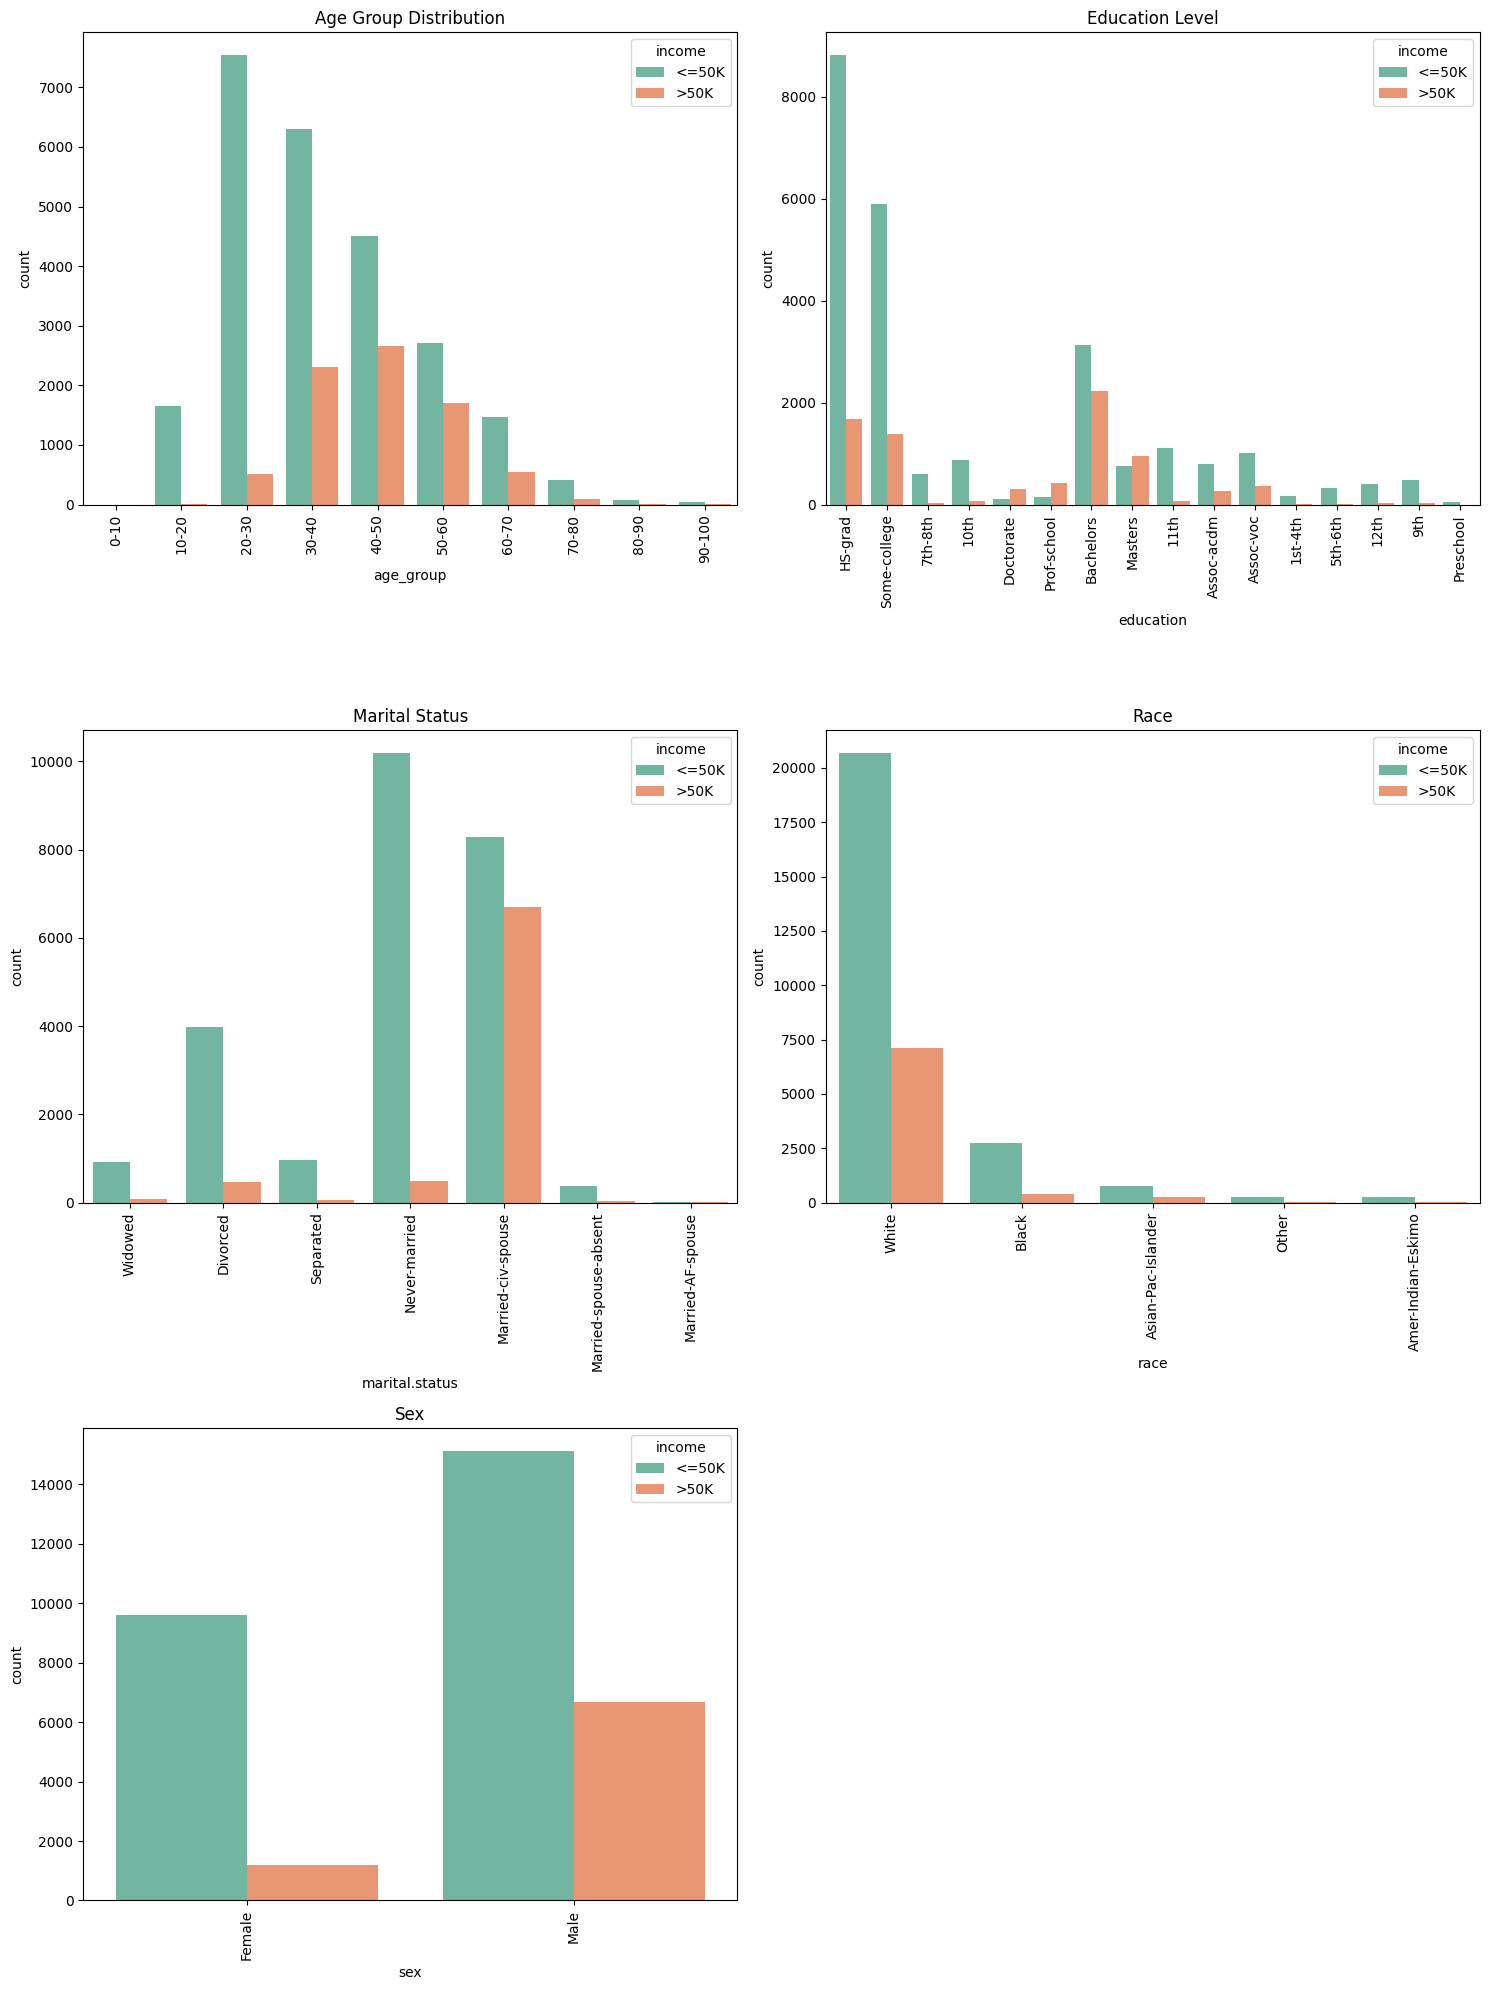

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df_adult['age_group'] = pd.cut(df_adult['age'], bins=age_bins, labels=age_labels, right=False)

# Creating a bar-in-bar chart for age, education, marital status, race, and sex
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

# Age distribution
sns.countplot(data=df_adult, x='age_group', hue='income', ax=axs[0, 0], palette='Set2').set_title('Age Group Distribution')
axs[0, 0].tick_params(axis='x', rotation=90)

# Education distribution
sns.countplot(data=df_adult, x='education', hue='income', ax=axs[0, 1], palette='Set2').set_title('Education Level')
axs[0, 1].tick_params(axis='x', rotation=90)

# Marital status distribution
sns.countplot(data=df_adult, x='marital.status', hue='income', ax=axs[1, 0], palette='Set2').set_title('Marital Status')
axs[1, 0].tick_params(axis='x', rotation=90)

# Race distribution
sns.countplot(data=df_adult, x='race', hue='income', ax=axs[1, 1], palette='Set2').set_title('Race')
axs[1, 1].tick_params(axis='x', rotation=90)

# Sex distribution
sns.countplot(data=df_adult, x='sex', hue='income', ax=axs[2, 0], palette='Set2').set_title('Sex')
axs[2, 0].tick_params(axis='x', rotation=90)

# Hide the empty subplot (axs[2, 1])
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()